实验 5：信号的抽样与恢复 


(1)设计一模拟信号， ，采样频率 为5120Hz，取信号频率  Hz（正常采样）和  Hz（欠采样）两种情况进行采样分析

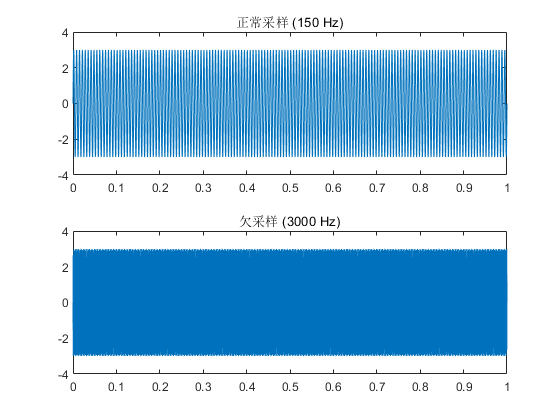

In [ ]:
% 定义采样频率
Fs = 5120; % 采样频率

% 定义信号频率
F_normal = 150; % 正常采样的信号频率
F_undersample = 3000; % 欠采样的信号频率

% 生成时间向量
t = 0:1/Fs:1; % 注意：这里时间向量长度为1秒

% 生成信号
signal_normal = 3 * sin(2 * pi * F_normal * t); % 正常采样信号
signal_undersample = 3 * sin(2 * pi * F_undersample * t); % 欠采样信号

% 绘制信号
subplot(2, 1, 1);
plot(t, signal_normal);
title('正常采样 (150 Hz)');

subplot(2, 1, 2);
plot(t, signal_undersample);
title('欠采样 (3000 Hz)');


(2)若信号频率为5000Hz,请问本实验中的模拟信号采样后的混迭频率是多少赫兹? 分析一个200Hz的方波信号，采样频率为500Hz,
用谱分析功能观察其频谱中的混迭现象，思考为什么会产生混迭。

混迭频率计算
当一个信号频率为5000Hz，并且采样频率为5120Hz时，我们可以计算其混迭频率。混迭（或混叠）是由于采样定理（奈奎斯特定理）被违反时发生的，即当采样频率小于信号频率的两倍时。混迭频率可以用下面的公式计算：

混迭频率

混迭频率=∣采样频率−信号频率∣

所以，对于5000Hz的信号和5120Hz的采样频率：


混迭频率=∣5120Hz−5000Hz∣=120Hz

方波信号的频谱分析
接下来，我们将分析一个200Hz的方波信号，其采样频率为500Hz。我们可以使用FFT（快速傅里叶变换）来分析信号的频谱，并观察混迭现象。混迭发生是因为高频分量“折叠”回低频区域。这种效应可以在频谱分析中观察到。

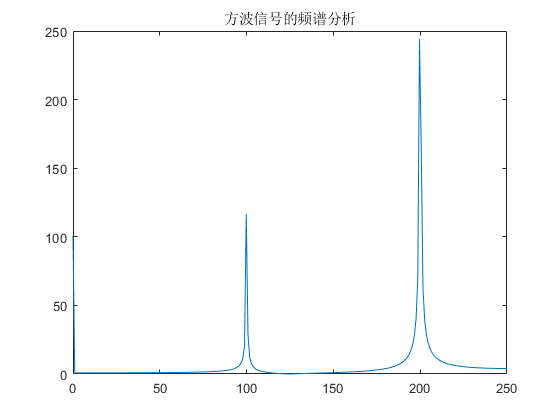

In [1]:
% 定义采样频率和信号频率
Fs = 500; % 采样频率
F_signal = 200; % 方波信号频率

% 生成时间向量
t = 0:1/Fs:1;

% 生成方波信号
square_signal = square(2 * pi * F_signal * t);

% 计算FFT
Y = fft(square_signal);
n = length(Y);
f = (0:n-1)*(Fs/n);

% 绘制频谱
plot(f, abs(Y));
title('方波信号的频谱分析');
xlim([0, Fs/2]); % 显示前半部分的频谱

(3) 在时域抽样定理中，为什么要求被抽样信号必须是带限信号?如果频带是无限的，应如何处理？

时域抽样定理，通常被称为奈奎斯特-香农采样定理，是数字信号处理的基础理论之一。该定理指出，为了能够从其样本无损完整地重建连续时间信号，该信号必须是带限的，即其频谱在某个有限频率范围内为零。
#### 为什么需要带限信号： 
1. **避免混迭（Aliasing）** ：如果信号不是带限的，或者说含有高于采样频率一半的频率分量，那么这些高频分量在采样过程中会与低频分量混叠，导致无法从采样数据中准确重建原始信号。这是因为高频分量在采样中会被错误地解释为低频分量。 
2. **确保唯一性** ：奈奎斯特定理保证了只要满足条件（采样频率大于信号最高频率的两倍），信号的重建是唯一的。如果信号不是带限的，无法确保这种唯一性，因为不同的信号可能在相同的采样点上产生相同的样本值。
### 处理非带限信号

如果信号的频带是无限的，或者说信号不是带限的，通常采用以下方法处理： 
1. **预滤波（Pre-Filtering）** ：在采样之前，使用一个低通滤波器将信号的高频部分滤除。这个低通滤波器的截止频率应小于或等于采样频率的一半。这样，即使原始信号不是带限的，经过滤波处理后的信号将成为带限的。 
2. **提高采样频率** ：如果预滤波不可行或者不希望丢失高频信息，可以通过提高采样频率来减少混迭的影响。采样频率越高，能够保留的信号带宽就越宽，从而在一定程度上允许信号包含更高的频率成分。 
3. **使用带通采样** ：对于某些特定应用，可以使用带通采样策略，其中信号被限制在一个特定的频带内，而不是简单地被限制在低频范围内。 
4. **后处理技术** ：在数字信号处理阶段，可以采用各种算法来尝试减少或校正由于混迭引起的失真。

综上所述，对于非带限信号，通常的做法是通过预滤波来确保信号带限，或者调整采样策略来适应信号的频谱特性。
